**Classifying, if an image contains a specific image**
* An object of either pizza or steak

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-10-24 14:17:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.223.251, 142.250.75.251, 172.217.20.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.223.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip'

     0K .......... .......... .......... .......... ..........  0%  175K 10m11s
    50K .......... .......... .......... .......... ..........  0%  225K 9m3s
   100K .......... .......... .......... .......... ..........  0%  478K 7m16s
   150K .......... .......... .......... .......... ..........  0%  649K 6m8s
   200K .......... .......... .......... .......... ..........  0%  777K 5m22s
   250K .......... .......... .......... .......... ..........  0% 1.11M 4m44s
   300K .......... .......... .......... .......... ..........  0% 1.11M 4m17s
   350K .......... ..

In [3]:
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

# Get the file paths lk('pizza_steak'):
for dirnames,  filenames, dirpath in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} image(s) in '{dirpath}'. ")


There are 11 directories and 2 image(s) in '[]'. 
There are 16 directories and 2 image(s) in '[]'. 
There are 22 directories and 0 image(s) in '['1001116.jpg', '1032754.jpg', '103708.jpg', '1060407.jpg', '106507.jpg', '1067986.jpg', '1106738.jpg', '1119571.jpg', '11297.jpg', '1152100.jpg', '1179703.jpg', '1180001.jpg', '1180273.jpg', '1183595.jpg', '1202689.jpg', '121960.jpg', '1220156.jpg', '1223284.jpg', '1226346.jpg', '1228171.jpg', '124815.jpg', '1265335.jpg', '1275885.jpg', '1280320.jpg', '129666.jpg', '1315645.jpg', '1342321.jpg', '1380247.jpg', '138961.jpg', '1398213.jpg', '139952.jpg', '139987.jpg', '140016.jpg', '1412011.jpg', '1445608.jpg', '144631.jpg', '1459760.jpg', '1475479.jpg', '1484836.jpg', '148765.jpg', '1503858.jpg', '1506213.jpg', '1507019.jpg', '1512557.jpg', '153195.jpg', '1555015.jpg', '1594097.jpg', '1618659.jpg', '1636919.jpg', '1655630.jpg', '1686938.jpg', '1687143.jpg', '1691503.jpg', '1694874.jpg', '1765727.jpg', '177513.jpg', '1843754.jpg', '1895182.jpg', 

In [5]:
num_pizza_train = len(os.listdir('pizza_steak/train/pizza'))
num_steak_train = len(os.listdir('pizza_steak/train/steak'))

num_pizza_train, num_steak_train

(750, 750)

In [6]:
import pathlib

dir_names = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in dir_names.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [7]:
# visualize the images
import matplotlib.image as mpimg
import random

In [9]:
def view_image(target_dir, target_class):
    target_folder = target_dir + target_class

    # picking a random image path
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)

    # read_image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"image shape:{img.shape}")
    return img

['877881.jpg']
image shape:(512, 512, 3)


array([[[127, 146, 142],
        [125, 144, 140],
        [125, 144, 142],
        ...,
        [215, 235, 236],
        [215, 235, 236],
        [212, 232, 233]],

       [[125, 144, 140],
        [125, 144, 140],
        [128, 147, 145],
        ...,
        [216, 236, 237],
        [217, 237, 238],
        [216, 236, 237]],

       [[127, 143, 140],
        [126, 142, 139],
        [129, 145, 144],
        ...,
        [217, 237, 238],
        [220, 240, 241],
        [220, 240, 241]],

       ...,

       [[147,  87,  25],
        [142,  82,  20],
        [135,  73,  12],
        ...,
        [102,  43,   9],
        [ 94,  38,   5],
        [ 97,  41,   8]],

       [[142,  84,  20],
        [143,  83,  20],
        [138,  77,  14],
        ...,
        [102,  46,  11],
        [ 97,  41,   8],
        [ 98,  41,  11]],

       [[146,  88,  24],
        [149,  91,  27],
        [149,  88,  25],
        ...,
        [105,  49,  14],
        [ 99,  42,  12],
        [100,  43,  13]]

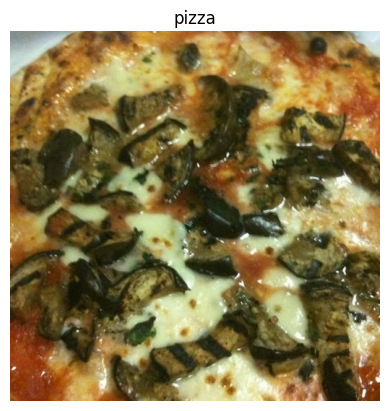

In [12]:
img = view_image("pizza_steak/train/", "pizza")
img

* Going to perform Feature Scaling and
  * load the image
  * preprocess the image 
* Build a cnn architecture for the data
  * define the model
  * compile it
  * fit the model   

In [13]:
img.shape

(512, 512, 3)

In [28]:
# load the data
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
tf.random.set_seed(42)

train_gen = ImageDataGenerator(rescale=1./225.0)
test_gen = ImageDataGenerator(rescale=1./225.0)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode = 'binary',
                                           seed = 42
                                         )

test_data = train_gen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='binary',
                                          seed = 42
                                        )



model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(224,224,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2), 2, padding='valid'))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2), 2, padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))


# compile the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)


# fit the model
model.fit(train_data,
          steps_per_epoch = len(train_data),
          epochs = 15,
          validation_data = test_data)
          # validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.5004 - loss: 0.6608 - val_accuracy: 0.5000 - val_loss: 0.5419
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 351ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5419
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.5156 - loss: 0.5456 - val_accuracy: 0.5000 - val_loss: 0.5370
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5370
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.4983 - loss: 0.5311 - val_accuracy: 0.5000 - val_loss: 0.5132
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5132
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.5019 - loss: 0.5300 - val_accuracy: 0.5000 - val_loss: 0.511